# Import Library

In this section, we import various Python libraries that will help us perform data manipulation, visualization, preprocessing, and build machine learning regression models. Each library serves a specific purpose — from handling data to evaluating and visualizing model performance.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
```

- **pandas (`pd`)**: Used for data manipulation and analysis. It allows easy handling of structured data such as CSV, Excel, or SQL data.
- **numpy (`np`)**: Provides mathematical functions and efficient operations on numerical arrays or matrices.
- **matplotlib.pyplot (`plt`)**: A plotting library used to create visualizations like line charts, bar charts, scatter plots, etc.
- **seaborn (`sns`)**: Built on top of Matplotlib, Seaborn provides a higher-level interface for making attractive and informative statistical graphics.

```python
from sklearn... import ...
```

- **sklearn**: This library is used for machine learning tasks such as classification, regression, clustering, and more. It provides a wide range of tools and algorithms to build and evaluate machine learning models.

```python
from xgboost import XGBRegressor
```

- **XGBRegressor**: This is an optimized version of gradient boosting that includes additional features and optimizations. It is known for its high performance and efficiency, especially on larger datasets.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.inspection import permutation_importance

from sklearn.svm import SVR
from xgboost import XGBRegressor

---

# Reading Dataset

In this part of the code, we are reading the dataset that contains the training and testing data for our machine learning model. The dataset is stored in a CSV (Comma-Separated Values) file, which is a common format for storing tabular data. We use the `pd.read_csv()` function from the `pandas` library to read the dataset into a DataFrame, which is a two-dimensional data structure that resembles a table.

In [2]:
data = pd.read_csv("data/burnout_submissions.csv")

data.describe()

,usia,jumlah_anak,usia_anak,lama_bekerja,waktu_bekerja_seminggu,beban_sks,mhs_bimbingan,work_life_balance,gaji_sesuai,1_tidak_mampu,...,4_waktu_tidak_cukup,5_tidak_berjalan_baik,6_terburu_buru,7_tidak_ada_jalan_keluar,8_masalah_menumpuk,9_ingin_menyerah,10_memikul_beban_berat,personal_vulnerability_ganjil,event_load_genap,skor_total
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,33.363636,0.818182,1.818182,6.363636,51.090909,22.538182,11.818182,3.000000,3.000000,2.090909,...,3.272727,2.0,3.181818,1.818182,2.636364,1.727273,2.545455,9.727273,14.636364,24.363636
std,3.384456,0.873863,2.088932,3.413875,6.992203,9.937572,9.526995,1.095445,1.095445,1.136182,...,1.678744,1.0,1.401298,0.981650,1.286291,1.272078,1.368476,4.649536,5.749308,9.749592
min,26.000000,0.000000,0.000000,0.000000,40.000000,10.000000,0.000000,2.000000,2.000000,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,10.000000
25%,31.500000,0.000000,0.000000,6.000000,45.500000,16.500000,5.000000,2.000000,2.000000,1.000000,...,2.000000,1.0,2.500000,1.000000,2.000000,1.000000,1.500000,6.000000,10.000000,16.000000
50%,34.000000,1.000000,2.000000,7.000000,50.000000,21.000000,9.000000,3.000000,3.000000,2.000000,...,4.000000,2.0,3.000000,2.000000,2.000000,1.000000,2.000000,11.000000,16.000000,25.000000
75%,35.500000,1.500000,3.000000,8.500000,58.000000,29.935000,17.000000,4.000000,4.000000,2.500000,...,5.000000,2.5,4.000000,2.000000,3.500000,2.000000,3.500000,12.000000,19.000000,31.500000
max,38.000000,2.000000,6.000000,10.000000,60.000000,43.000000,30.000000,5.000000,5.000000,4.000000,...,5.000000,4.0,5.000000,4.000000,5.000000,5.000000,5.000000,20.000000,22.000000,41.000000


# Define Features and Target

In this part of the code, we define which columns from our dataset will be used as **features (input variables)** and which column will be used as the **target (output variable)** for the regression model.

The goal here is to separate the data into two main parts:

* **`X` (features):** the variables that will be used by the model to make predictions.
* **`y` (target):** the variable that we want the model to predict — in this case, the **total stress score (`skor_total`)**.

In [3]:
features_to_drop = [
    'tinggal_dengan_siapa', 'kesehatan_fisik', 'kondisi_mental',
    '1_tidak_mampu', '2_kewalahan_tanggung_jawab', '3_keadaan_tidak_berpihak',
    '4_waktu_tidak_cukup', '5_tidak_berjalan_baik', '6_terburu_buru',
    '7_tidak_ada_jalan_keluar', '8_masalah_menumpuk', '9_ingin_menyerah',
    '10_memikul_beban_berat', 'personal_vulnerability_ganjil', 'PV',
    'event_load_genap', 'EV', 'skor_total', 'risiko_stres'
]

X = data.drop(columns=features_to_drop)
y = data['skor_total']

In [4]:
print(f"Number of Features: {len(X.columns)}")
print(f"Features: {X.columns.tolist()}")

Number of Features: 44
Features: ['usia', 'jenis_kelamin', 'kota_asal', 'status_pernikahan', 'jumlah_anak', 'usia_anak', 'tinggal_sendiri', 'tinggal_pasangan', 'tinggal_anak', 'tinggal_ortu', 'tinggal_mertua', 'tinggal_saudara', 'tinggal_teman', 'profesi', 'bidang', 'lama_bekerja', 'mode_bekerja', 'jarak', 'waktu_bekerja_seminggu', 'beban_sks', 'mhs_bimbingan', 'jabatan_struktural', 'jabatan_fungsional', 'sertifikasi', 'status_keaktifan', 'fisik_mata', 'fisik_punggung', 'fisik_tensi', 'fisik_lemah', 'fisik_kepala', 'fisik_obesitas', 'fisik_imun', 'fisik_carpal', 'mental_anxiety', 'mental_burnout', 'mental_depresi', 'mental_distress', 'mental_konsentrasi', 'mental_insomnia', 'mental_iritate', 'mental_lelah', 'mental_stres', 'work_life_balance', 'gaji_sesuai']


---

# Preprocessing Non-Numerical Features

Not all features in a dataset are numerical. Some columns may contain **categorical data** (e.g., gender, job position, or living situation) or **boolean values** (e.g., yes/no). Since most machine learning models require numerical input, these categorical variables need to be transformed into numbers.

In this part of the code, we identify which features are **numerical** and which are **categorical**, and then apply different preprocessing steps using **`ColumnTransformer`** — scaling numerical data and encoding categorical data.

## Step Explanation

* **`numerical_features`** → Selects all numeric columns (`int64`, `float64`) to be standardized using `StandardScaler`.
* **`categorical_features`** → Selects all non-numeric columns (`object`, `bool`) that require encoding into numbers.
* **`ColumnTransformer`** → Combines preprocessing steps for different feature types:

  * `'num'`: Applies **`StandardScaler`** to numerical columns so that all values have a mean of 0 and a standard deviation of 1.
  * `'cat'`: Applies **`OneHotEncoder`** to categorical columns, converting each category into a binary column (0 or 1).
  * `remainder='passthrough'`: Keeps any remaining columns unchanged.

## About One-Hot Encoding

**One-Hot Encoding** is a method for converting categorical data into a numerical form that machine learning algorithms can interpret. Instead of assigning arbitrary numbers (like 1, 2, 3), which would imply an order or ranking, one-hot encoding creates **binary columns** for each unique category.

This ensures that the model treats categories equally without assuming any hierarchy.

### One-Hot Encoding Explained

Suppose we have a column named `living_status` with three categories: `"Alone"`, `"With Family"`, and `"With Friends"`.

Original data:

| living_status |
| ------------- |
| Alone         |
| With Family   |
| With Friends  |
| Alone         |
| With Family   |

After applying one-hot encoding, it becomes:

| living_status_Alone | living_status_WithFamily | living_status_WithFriends |
| ------------------- | ------------------------ | ------------------------- |
| 1                   | 0                        | 0                         |
| 0                   | 1                        | 0                         |
| 0                   | 0                        | 1                         |
| 1                   | 0                        | 0                         |
| 0                   | 1                        | 0                         |

## Why This Step Matters

* Ensures **all input data is numerical**, which is required for most machine learning algorithms.
* Prevents **bias or errors** from arbitrary numeric category encoding.
* Makes model training **consistent and reliable**, especially when unseen categories appear in the test set (handled by `handle_unknown='ignore'`).

By preprocessing both numerical and categorical features properly, we ensure that the dataset is fully prepared for **model training and evaluation**.


In [5]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'bool']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

print(f"Numerical Features: {numerical_features}")
print(f"Categorical Features: {categorical_features}")

Numerical Features: ['usia', 'jumlah_anak', 'usia_anak', 'lama_bekerja', 'waktu_bekerja_seminggu', 'beban_sks', 'mhs_bimbingan', 'work_life_balance', 'gaji_sesuai']
Categorical Features: ['jenis_kelamin', 'kota_asal', 'status_pernikahan', 'tinggal_sendiri', 'tinggal_pasangan', 'tinggal_anak', 'tinggal_ortu', 'tinggal_mertua', 'tinggal_saudara', 'tinggal_teman', 'profesi', 'bidang', 'mode_bekerja', 'jarak', 'jabatan_struktural', 'jabatan_fungsional', 'sertifikasi', 'status_keaktifan', 'fisik_mata', 'fisik_punggung', 'fisik_tensi', 'fisik_lemah', 'fisik_kepala', 'fisik_obesitas', 'fisik_imun', 'fisik_carpal', 'mental_anxiety', 'mental_burnout', 'mental_depresi', 'mental_distress', 'mental_konsentrasi', 'mental_insomnia', 'mental_iritate', 'mental_lelah', 'mental_stres']


In [6]:
# Preprocessing results check
# First, fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
feature_names_after = preprocessor.get_feature_names_out()

print(f"Number of features before preprocessing: {X.shape[1]}")
print(f"Number of features after preprocessing: {X_preprocessed.shape[1]}")
print(f"\nShape of original data: {X.shape}")
print(f"Shape of data after preprocessing: {X_preprocessed.shape}")

print(f"\n{'='*80}")
print("Feature names after preprocessing:")
print(f"{'='*80}")
for i, name in enumerate(feature_names_after, 1):
    print(f"{i:3d}. {name}")

# Convert to DataFrame to see the first few rows
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names_after)
print(f"\n{'='*80}")
print("First 5 rows of data after preprocessing:")
print(f"{'='*80}")
print(X_preprocessed_df.head())

print(f"\n{'='*80}")
print("Descriptive statistics of data after preprocessing:")
print(f"{'='*80}")
print(X_preprocessed_df.describe())

Number of features before preprocessing: 44
Number of features after preprocessing: 107

Shape of original data: (11, 44)
Shape of data after preprocessing: (11, 107)

Feature names after preprocessing:
  1. num__usia
  2. num__jumlah_anak
  3. num__usia_anak
  4. num__lama_bekerja
  5. num__waktu_bekerja_seminggu
  6. num__beban_sks
  7. num__mhs_bimbingan
  8. num__work_life_balance
  9. num__gaji_sesuai
 10. cat__jenis_kelamin_Laki-laki
 11. cat__jenis_kelamin_Perempuan
 12. cat__kota_asal_Bandar Lampung
 13. cat__kota_asal_Jembrana, Bali
 14. cat__kota_asal_Lampung
 15. cat__kota_asal_Lampung Selatan
 16. cat__kota_asal_Medan
 17. cat__kota_asal_Padangsidimpuan
 18. cat__kota_asal_Salatiga
 19. cat__kota_asal_Semarang
 20. cat__kota_asal_Yogyakarta 
 21. cat__status_pernikahan_Belum Menikah
 22. cat__status_pernikahan_Sudah Menikah
 23. cat__tinggal_sendiri_False
 24. cat__tinggal_sendiri_True
 25. cat__tinggal_pasangan_False
 26. cat__tinggal_pasangan_True
 27. cat__tinggal_anak_F

---

# Splitting Data Into 5 Folds

```python
kf = KFold(n_splits=5, shuffle=True, random_state=2024)
```

This line initializes a K-Fold cross-validator from scikit-learn's model selection module. Let's break down the parameters:

- `n_splits=5`: This sets up 5-fold cross-validation. The data will be divided into 5 equal parts or "folds".
- `shuffle=True`: This parameter tells the cross-validator to shuffle the data before splitting it into folds. This helps to ensure that the order of the data doesn't affect the results.
- `random_state=2024`: This sets a specific random seed for reproducibility. Using the same random state will ensure that the data is shuffled in the same way every time the code is run.

In 5-fold cross-validation:
1. The data is divided into 5 equal subsets or folds.
2. The model is trained on 4 folds and tested on the remaining fold.
3. This process is repeated 5 times, with each fold serving as the test set exactly once.
4. The performance metrics are then averaged across all 5 iterations.

This method helps to get a more robust estimate of the model's performance by using all the data for both training and testing.

In [7]:
kf = KFold(n_splits=5, shuffle=True, random_state=2024)

---

# Define Model

In this experiment, I tried to simultaneously use five models: LinearRegression, XGBoost, RandomForest, GradientBoosting, and Support Vector Machine. The model that performs best will be used to make predictions on the test set.

In [8]:
models = {
    'LR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())]),
    'XGB': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=2024))]),
    'RFR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', RandomForestRegressor(n_estimators=100, random_state=2024))]),
    'GBR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=2024))]),
    'SVR': Pipeline(steps=[('preprocessor', preprocessor), ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))])
}

In [9]:
results = {model: {'r2': [], 'rmse': [], 'mae': []} for model in models}

---

# Training

In this part of the code, we are training the machine learning model using the training data. The model learns the relationship between the input features and the target variable by adjusting its internal parameters based on the training data. The goal is to minimize the error between the predicted values and the actual values in the training set.

In [10]:
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        results[name]['r2'].append(r2_score(y_test, y_pred))
        results[name]['rmse'].append(np.sqrt(mean_squared_error(y_test, y_pred)))
        results[name]['mae'].append(np.mean(np.abs(y_test - y_pred)))

---

# Evaluate Model

We use three metrics to evaluate the performance of the model:
* R2 Score: It is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. The R2 score ranges from 0 to 1, where 1 indicates a perfect fit and 0 indicates no relationship between the independent and dependent variables.
* RMSE (Root Mean Squared Error): It is a measure of the differences between values predicted by a model and the values observed. It is the square root of the average of the squared differences between the predicted and actual values.
* MAE (Mean Absolute Error): It is a measure of errors between paired observations expressing the same phenomenon. It is the average of the absolute differences between the predicted and actual values.

In [11]:
for name, metrics in results.items():
    print(f"{name} Results:")
    print(f"Average R-squared: {np.mean(metrics['r2']):.4f} (+/- {np.std(metrics['r2']):.4f})")
    print(f"Average RMSE: {np.mean(metrics['rmse']):.4f} (+/- {np.std(metrics['rmse']):.4f})")
    print(f"Average MAE: {np.mean(metrics['mae']):.4f} (+/- {np.std(metrics['mae']):.4f})")
    print()

LR Results:
Average R-squared: -2.1474 (+/- 1.5206)
Average RMSE: 13.4269 (+/- 4.0771)
Average MAE: 12.2758 (+/- 2.8310)

XGB Results:
Average R-squared: -2.0396 (+/- 1.7410)
Average RMSE: 12.6882 (+/- 2.8331)
Average MAE: 11.5092 (+/- 2.2459)

RFR Results:
Average R-squared: -1.1825 (+/- 1.1865)
Average RMSE: 10.9854 (+/- 3.5961)
Average MAE: 9.7403 (+/- 3.3656)

GBR Results:
Average R-squared: -2.1316 (+/- 1.2812)
Average RMSE: 13.8219 (+/- 5.0483)
Average MAE: 12.5771 (+/- 4.6027)

SVR Results:
Average R-squared: -0.8186 (+/- 1.2728)
Average RMSE: 9.5486 (+/- 1.2450)
Average MAE: 8.5265 (+/- 1.0764)



Based on the results of the evaluation metrics, we can determine how well the model is performing and make adjustments as needed to improve its performance. From the five models, SVR performed the best, with the highest R2 score and lowest RMSE and MAE values.

---

# Check Feature Importance

We want to check, from all of the features, which features are the most important in predicting the target variable. This can help us understand which features have the most impact on the target variable and how they contribute to the model's predictions.

If the coefficients of the features are positive, it means that the feature has a positive impact on the target variable. If the coefficients are negative, it means that the feature has a negative impact (inverse) on the target variable.

We will sort the features based on their coefficients to identify the most important features in the model.

In [12]:
def get_feature_importance(model, model_name, X, y):
    feature_names = model.named_steps['preprocessor'].get_feature_names_out()
    
    if model_name == 'LR':
        importances = model.named_steps['regressor'].coef_
    elif model_name in ['XGB', 'RFR', 'GBR']:
        importances = model.named_steps['regressor'].feature_importances_
    elif model_name == 'SVR':
        perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=2024)
        importances = perm_importance.importances_mean
    else:
        return None

    feature_importance = dict(zip(feature_names, importances))
    return dict(sorted(feature_importance.items(), key=lambda item: abs(item[1]), reverse=True))

# Visualizing Feature Importance

Understanding which features contribute most to a machine learning model’s predictions is crucial for interpretability and model refinement. In this section, we visualize **feature importance** for each model to see which variables have the greatest influence on the output (`skor_total`).

In [13]:
# Define feature categories based on the dataset
feature_categories = {
    'Demografi': [
        'usia',
        'jenis_kelamin',
        'status_pernikahan',
        'jumlah_anak',
        'usia_anak',
        'kota_asal'
    ],
    
    'Tinggal & Lingkungan Sosial': [
        'tinggal_sendiri',
        'tinggal_pasangan',
        'tinggal_anak',
        'tinggal_ortu',
        'tinggal_mertua',
        'tinggal_saudara',
        'tinggal_teman'
    ],
    
    'Pekerjaan & Karier': [
        'profesi',
        'bidang',
        'jabatan_struktural',
        'jabatan_fungsional',
        'sertifikasi',
        'status_keaktifan',
        'mode_bekerja',
        'jarak',
        'lama_bekerja',
        'waktu_bekerja_seminggu',
        'beban_sks',
        'mhs_bimbingan',
        'gaji_sesuai'
    ],
    
    'Keseimbangan Hidup (Work-Life Balance)': [
        'work_life_balance'
    ],
    
    'Kondisi Fisik': [
        'fisik_mata',
        'fisik_punggung',
        'fisik_tensi',
        'fisik_lemah',
        'fisik_kepala',
        'fisik_obesitas',
        'fisik_imun',
        'fisik_carpal'
    ],
    
    'Kondisi Mental': [
        'mental_anxiety',
        'mental_burnout',
        'mental_depresi',
        'mental_distress',
        'mental_konsentrasi',
        'mental_insomnia',
        'mental_iritate',
        'mental_lelah',
        'mental_stres'
    ]
}

# Create a reverse mapping: feature -> category
feature_to_category = {}
for category, features in feature_categories.items():
    for feature in features:
        feature_to_category[feature] = category

print("Feature categories defined:")
for cat, feats in feature_categories.items():
    print(f"  {cat}: {len(feats)} features")

Feature categories defined:
  Demografi: 6 features
  Tinggal & Lingkungan Sosial: 7 features
  Pekerjaan & Karier: 13 features
  Keseimbangan Hidup (Work-Life Balance): 1 features
  Kondisi Fisik: 8 features
  Kondisi Mental: 9 features


In [14]:
def plot_category_importance(category_name, features_in_category, all_importances, threshold=0.001, show_negative=False, normalize=True):
    """
    Plot feature importance for a specific category with model comparison.
    Only shows features with POSITIVE importance values (>= 0) by default.
    
    Parameters:
    -----------
    category_name : str
        Name of the category (e.g., 'Demografi', 'Kondisi Mental')
    features_in_category : list
        List of feature names in this category
    all_importances : dict
        Dictionary of {model_name: {feature: importance}}
    threshold : float
        Minimum absolute importance to include
    show_negative : bool
        If False (default), only shows features with importance >= 0
        If True, shows all features including negative importance
    normalize : bool
        If True (default), normalize importance values to 0-1 range within each category
        This helps reduce gaps between high and low importance features
    """
    
    # Collect data for plotting
    plot_data = []
    
    for model_name, importances in all_importances.items():
        for feature in features_in_category:
            # Match feature with or without prefix (num__, cat__)
            matched_feature = None
            for full_feature in importances.keys():
                # Try exact match or with common prefixes
                if (full_feature.endswith(feature) or 
                    full_feature == f"num__{feature}" or 
                    full_feature == f"cat__{feature}" or
                    f"__{feature}" in full_feature):
                    matched_feature = full_feature
                    break
            
            if matched_feature:
                importance_value = importances[matched_feature]
                
                # Filter based on threshold and positive/negative setting
                if abs(importance_value) > threshold:
                    # Only include if show_negative=True OR importance >= 0
                    if show_negative or importance_value >= 0:
                        plot_data.append({
                            'Feature': feature,
                            'Model': model_name,
                            'Importance': importance_value
                        })
    
    if not plot_data:
        print(f"No significant POSITIVE features found for category '{category_name}' (threshold={threshold})")
        return
    
    # Convert to DataFrame
    df_plot = pd.DataFrame(plot_data)
    
    # Apply normalization if requested
    if normalize:
        # Normalize within each model to 0-1 range
        df_plot['Importance'] = df_plot.groupby('Model')['Importance'].transform(
            lambda x: (x - x.min()) / (x.max() - x.min()) if (x.max() - x.min()) > 0 else x
        )
    
    # Get unique features and sort by average importance (not absolute, since we only show positive)
    feature_avg_importance = df_plot.groupby('Feature')['Importance'].mean()
    sorted_features = feature_avg_importance.sort_values(ascending=True).index.tolist()
    
    # Create the plot
    fig, ax = plt.subplots(figsize=(12, max(6, len(sorted_features) * 0.6)))
    
    # Define colors for each model
    model_colors = {
        'LR': '#3498db',   # Blue
        'XGB': '#e74c3c',  # Red
        'RFR': '#2ecc71',  # Green
        'GBR': '#f39c12',  # Orange
        'SVR': '#9b59b6'   # Purple
    }
    
    # Group by feature and model
    num_models = len(all_importances)
    bar_width = 0.15
    
    for i, model_name in enumerate(all_importances.keys()):
        model_data = df_plot[df_plot['Model'] == model_name]
        
        # Create a mapping of feature to importance
        feature_imp_map = dict(zip(model_data['Feature'], model_data['Importance']))
        
        # Get importances in the order of sorted_features
        importances = [feature_imp_map.get(feat, 0) for feat in sorted_features]
        
        # Calculate positions
        positions = np.arange(len(sorted_features)) + i * bar_width
        
        # Plot bars
        ax.barh(positions, importances, bar_width, 
                label=model_name, color=model_colors[model_name], alpha=0.8)
    
    # Customize plot
    ax.set_yticks(np.arange(len(sorted_features)) + bar_width * (num_models - 1) / 2)
    ax.set_yticklabels(sorted_features)
    ax.set_xlabel('Feature Importance' + (' (Normalized 0-1)' if normalize else ''), fontsize=12, fontweight='bold')
    ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
    title_suffix = '\n(Normalized, showing only POSITIVE contributions)' if normalize else '\n(Showing only POSITIVE contributions)'
    ax.set_title(f'Feature Importance Comparison - {category_name}{title_suffix}', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    ax.legend(title='Model', loc='best', frameon=True, shadow=True)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print(f"\n{'='*80}")
    print(f"Category: {category_name}")
    print(f"{'='*80}")
    print(f"Number of features displayed: {len(sorted_features)} (positive importance only)")
    print(f"Models compared: {', '.join(all_importances.keys())}")
    print(f"Normalization: {'Enabled (0-1 scale per model)' if normalize else 'Disabled (raw values)'}")
    print(f"\nTop 3 features (by average importance):")
    for idx, feat in enumerate(sorted_features[-3:][::-1], 1):
        avg_imp = feature_avg_importance[feat]
        print(f"  {idx}. {feat}: {avg_imp:.4f}")
    print()

In [15]:
# Collect all feature importances from all models
all_model_importances = {}
for name, model in models.items():
    importance = get_feature_importance(model, name, X, y)
    if importance:
        all_model_importances[name] = importance

print("Feature importances collected for all models")
print(f"Models: {list(all_model_importances.keys())}")

Feature importances collected for all models
Models: ['LR', 'XGB', 'RFR', 'GBR', 'SVR']


FEATURE IMPORTANCE BY CATEGORY - MODEL COMPARISON

Processing category: Demografi


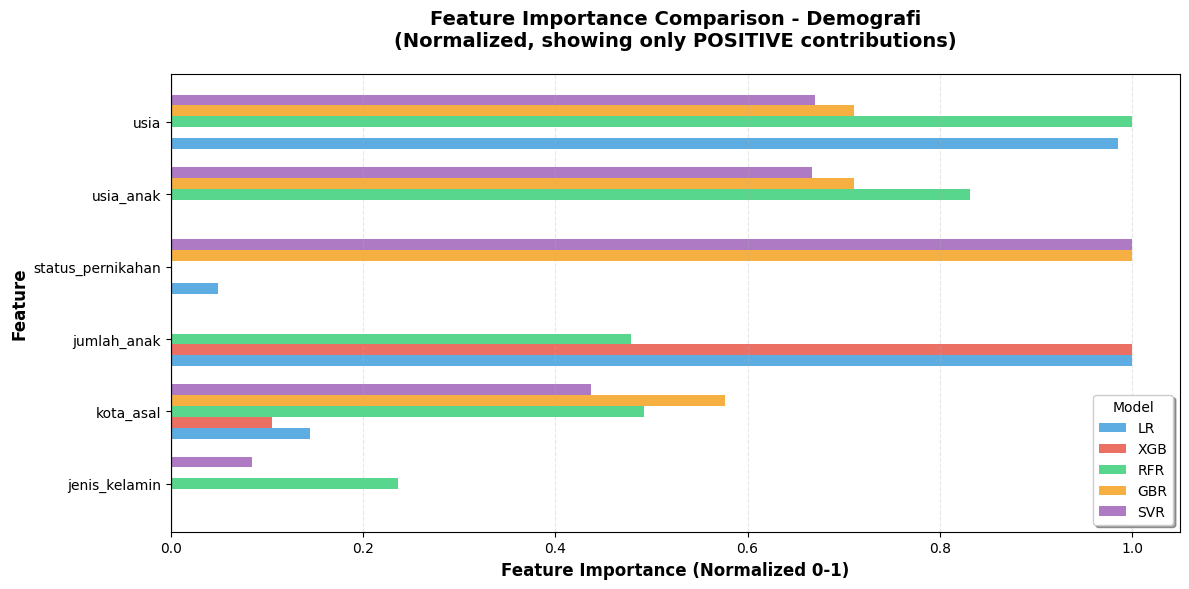


Category: Demografi
Number of features displayed: 6 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. usia: 0.6732
  2. usia_anak: 0.5523
  3. status_pernikahan: 0.5123


Processing category: Tinggal & Lingkungan Sosial


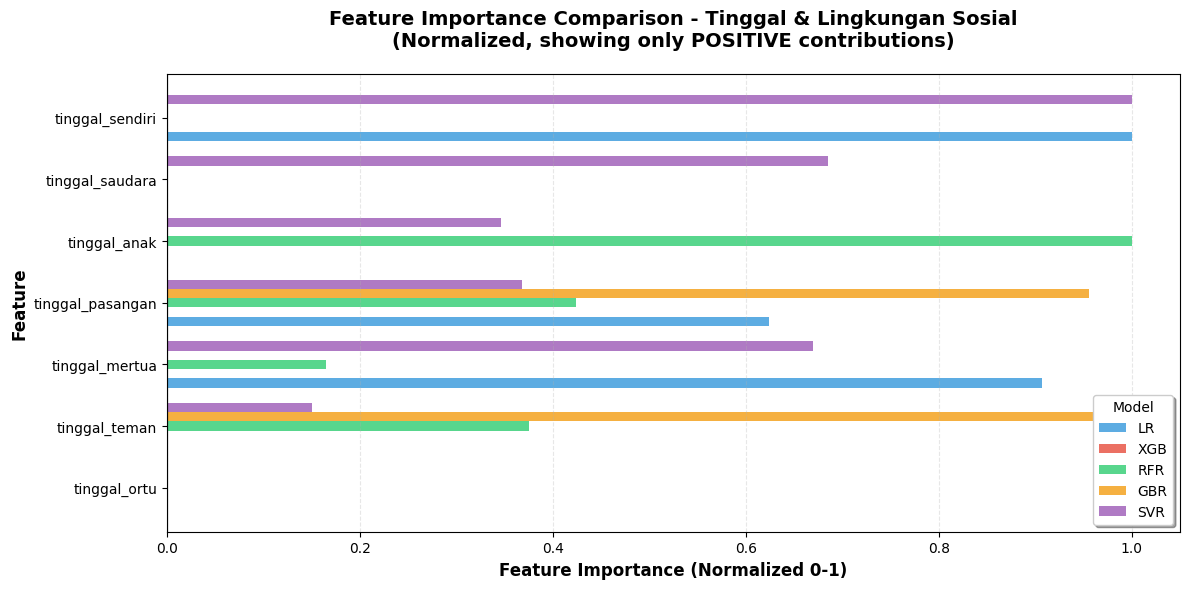


Category: Tinggal & Lingkungan Sosial
Number of features displayed: 7 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. tinggal_sendiri: 1.0000
  2. tinggal_saudara: 0.6847
  3. tinggal_anak: 0.6732


Processing category: Pekerjaan & Karier


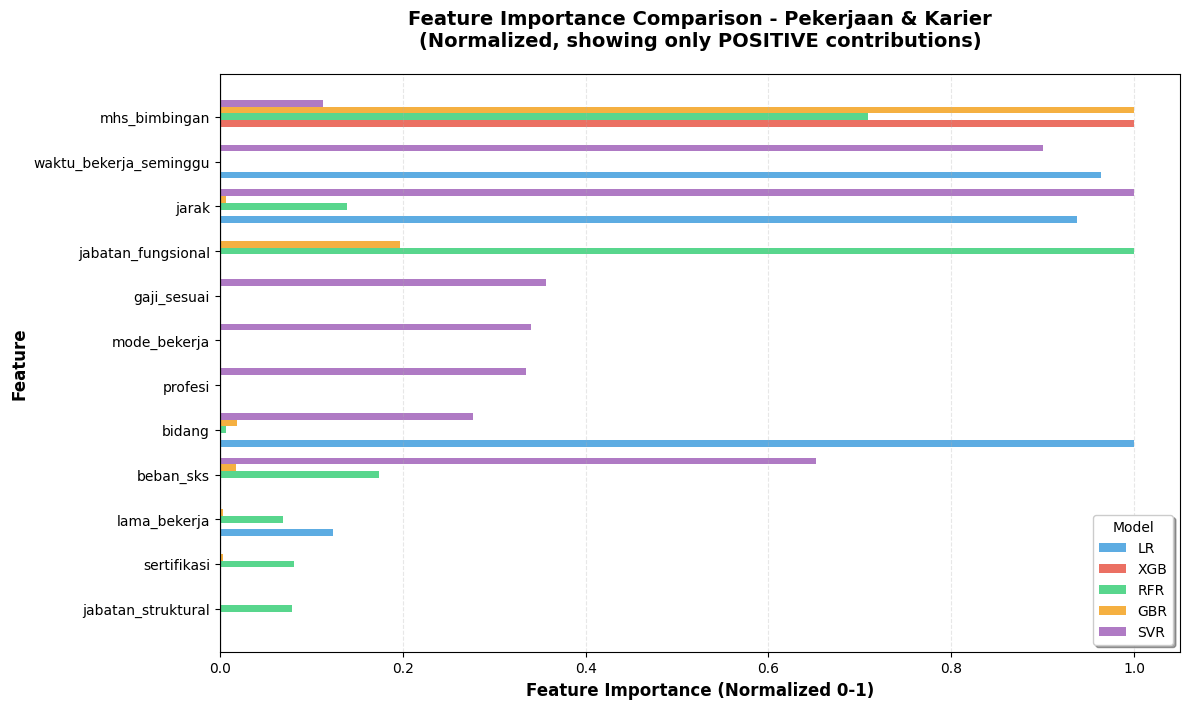


Category: Pekerjaan & Karier
Number of features displayed: 12 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. mhs_bimbingan: 0.7055
  2. waktu_bekerja_seminggu: 0.6213
  3. jarak: 0.5209


Processing category: Keseimbangan Hidup (Work-Life Balance)


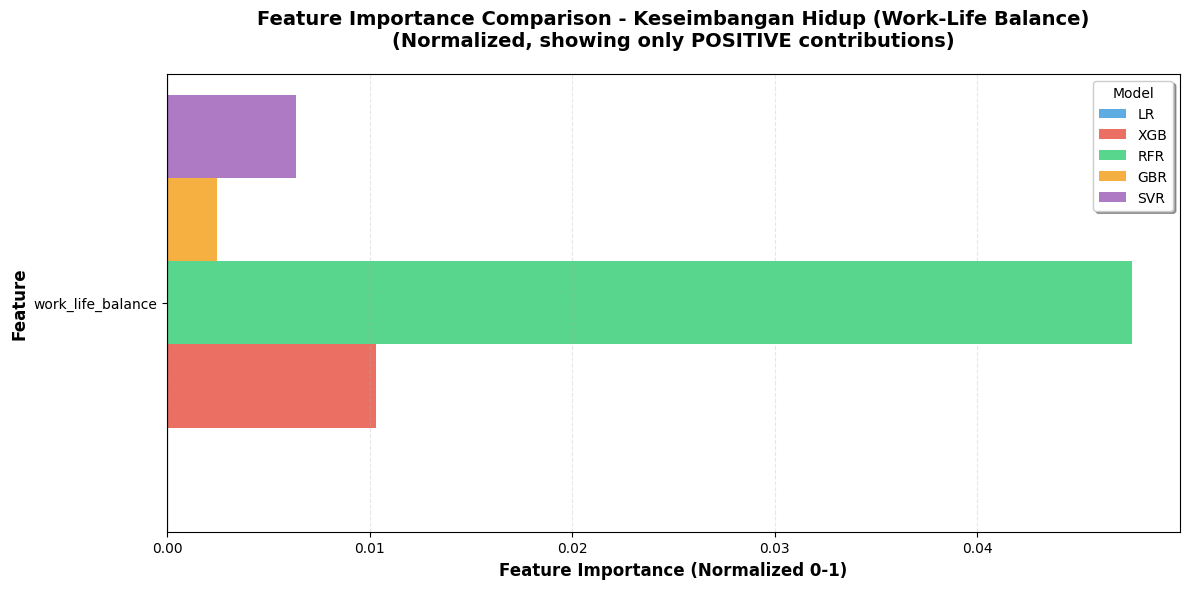


Category: Keseimbangan Hidup (Work-Life Balance)
Number of features displayed: 1 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. work_life_balance: 0.0167


Processing category: Kondisi Fisik


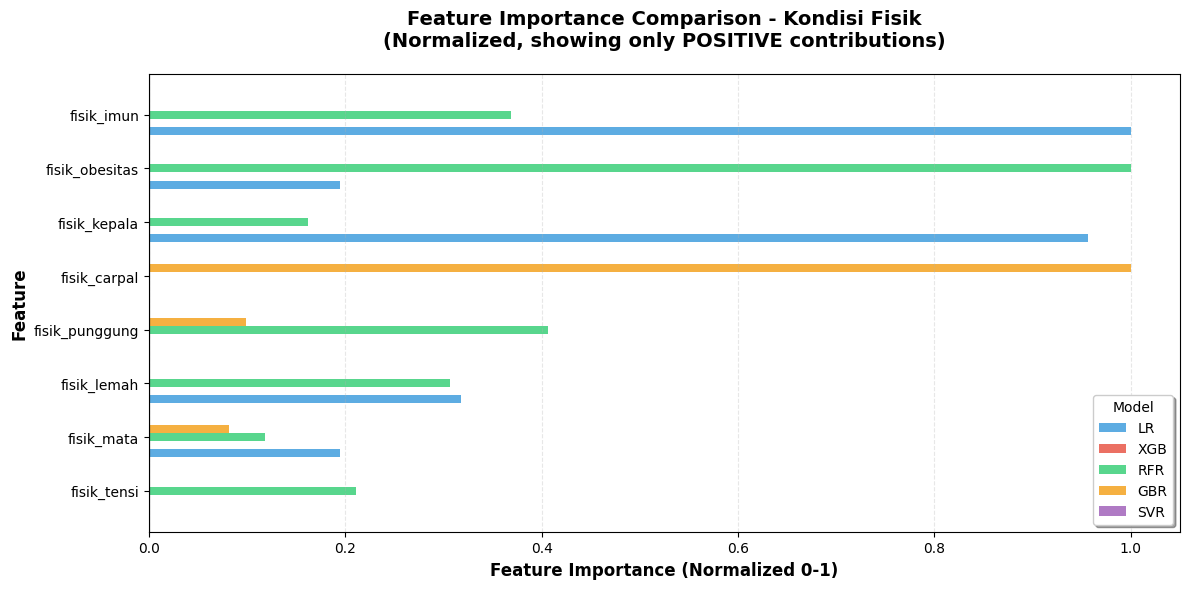


Category: Kondisi Fisik
Number of features displayed: 8 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. fisik_imun: 0.6842
  2. fisik_obesitas: 0.5974
  3. fisik_kepala: 0.5592


Processing category: Kondisi Mental


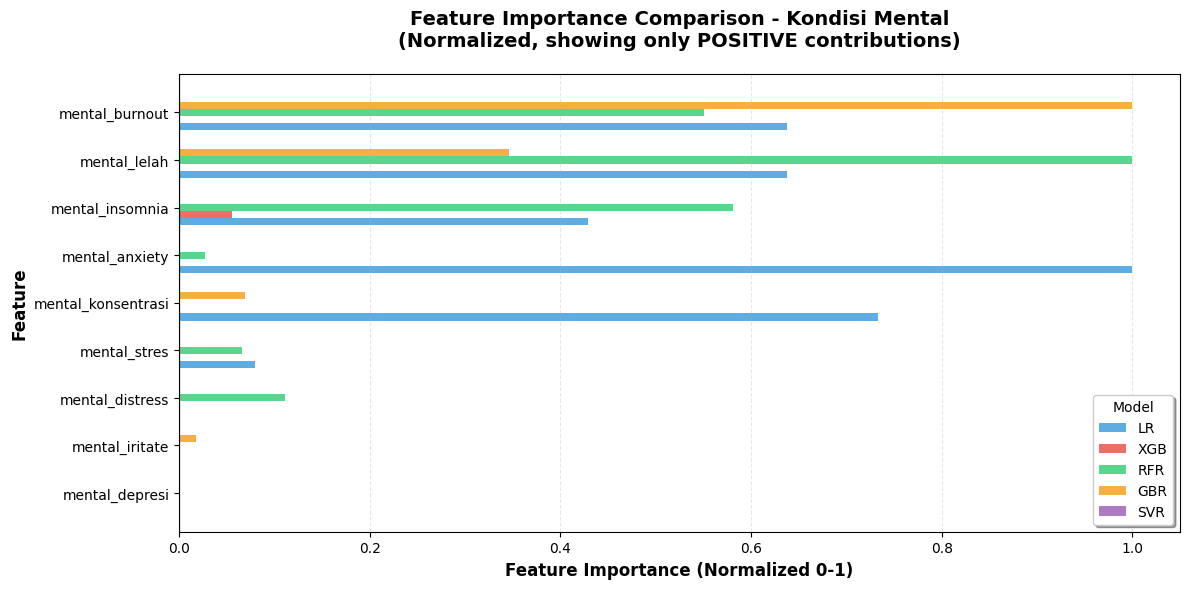


Category: Kondisi Mental
Number of features displayed: 9 (positive importance only)
Models compared: LR, XGB, RFR, GBR, SVR
Normalization: Enabled (0-1 scale per model)

Top 3 features (by average importance):
  1. mental_burnout: 0.7294
  2. mental_lelah: 0.6611
  3. mental_insomnia: 0.3551



In [16]:
# Generate visualizations for each category
print("="*80)
print("FEATURE IMPORTANCE BY CATEGORY - MODEL COMPARISON")
print("="*80)

for category_name, features in feature_categories.items():
    print(f"\n{'='*80}")
    print(f"Processing category: {category_name}")
    print(f"{'='*80}")
    
    # With normalization (default) - easier to compare across models
    plot_category_importance(category_name, features, all_model_importances, 
                            threshold=0.001, normalize=True)
    
    # If you want to see raw values without normalization, use:
    # plot_category_importance(category_name, features, all_model_importances, 
    #                         threshold=0.001, normalize=False)

In [17]:
# Calculate feature importances for all models
# Use the already defined X and y from earlier
feature_importances = {}
for name, model in models.items():
    importance = get_feature_importance(model, name, X, y)
    if importance:
        # Convert to unsorted dict for DataFrame creation
        feature_importances[name] = importance

# Create a DataFrame from the feature importances
df_importance = pd.DataFrame(feature_importances)

# Sort the DataFrame by the average importance across all models
df_importance['avg_importance'] = df_importance.abs().mean(axis=1)  # Use absolute values for averaging
df_importance = df_importance.sort_values('avg_importance', ascending=False)
df_importance = df_importance.drop('avg_importance', axis=1)

# Rename the index to include the categorical labels (cleaner names)
new_index = []
for feature in df_importance.index:
    if feature.startswith('cat__'):
        parts = feature.split('__')
        if len(parts) == 3:
            new_index.append(f"{parts[1]}_{parts[2]}")
        else:
            new_index.append(feature)
    elif feature.startswith('num__'):
        # Remove 'num__' prefix for cleaner names
        new_index.append(feature.replace('num__', ''))
    else:
        new_index.append(feature)
df_importance.index = new_index

# Save the DataFrame to a CSV file
df_importance.to_csv('feature_importance_comparison.csv')

print("Feature importance comparison has been saved to 'feature_importance_comparison.csv'")
print(f"\nTotal features saved: {len(df_importance)}")
print(f"\nTop 10 most important features (by average):")
print(df_importance.abs().mean(axis=1).head(10))

Feature importance comparison has been saved to 'feature_importance_comparison.csv'

Total features saved: 104

Top 10 most important features (by average):
mhs_bimbingan                     0.547710
cat__jabatan_fungsional_Lektor    0.454561
jumlah_anak                       0.369850
usia                              0.369202
cat__mental_anxiety_True          0.357947
cat__mental_burnout_False         0.297224
cat__mental_konsentrasi_True      0.291641
cat__fisik_imun_True              0.290402
cat__mental_lelah_False           0.286488
cat__fisik_kepala_True            0.283339
dtype: float64
